In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Importing Data-Set

In [66]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

### Checking Nunll Values 

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking Duplicates

In [8]:
df.duplicated().sum()

240

In [10]:
df.drop_duplicates(inplace = True )

In [11]:
df.duplicated().sum()

0

# EDA

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [45]:
def analysis(x):
    print(f'Analysis on {x}')
    print('Unique Count:',df[x].nunique())
    

In [46]:
for i in df.columns:
    analysis(i)

Analysis on fixed acidity
Unique Count: 96
Analysis on volatile acidity
Unique Count: 143
Analysis on citric acid
Unique Count: 80
Analysis on residual sugar
Unique Count: 91
Analysis on chlorides
Unique Count: 153
Analysis on free sulfur dioxide
Unique Count: 60
Analysis on total sulfur dioxide
Unique Count: 144
Analysis on density
Unique Count: 436
Analysis on pH
Unique Count: 89
Analysis on sulphates
Unique Count: 96
Analysis on alcohol
Unique Count: 65
Analysis on quality
Unique Count: 6


### Checking Correlation

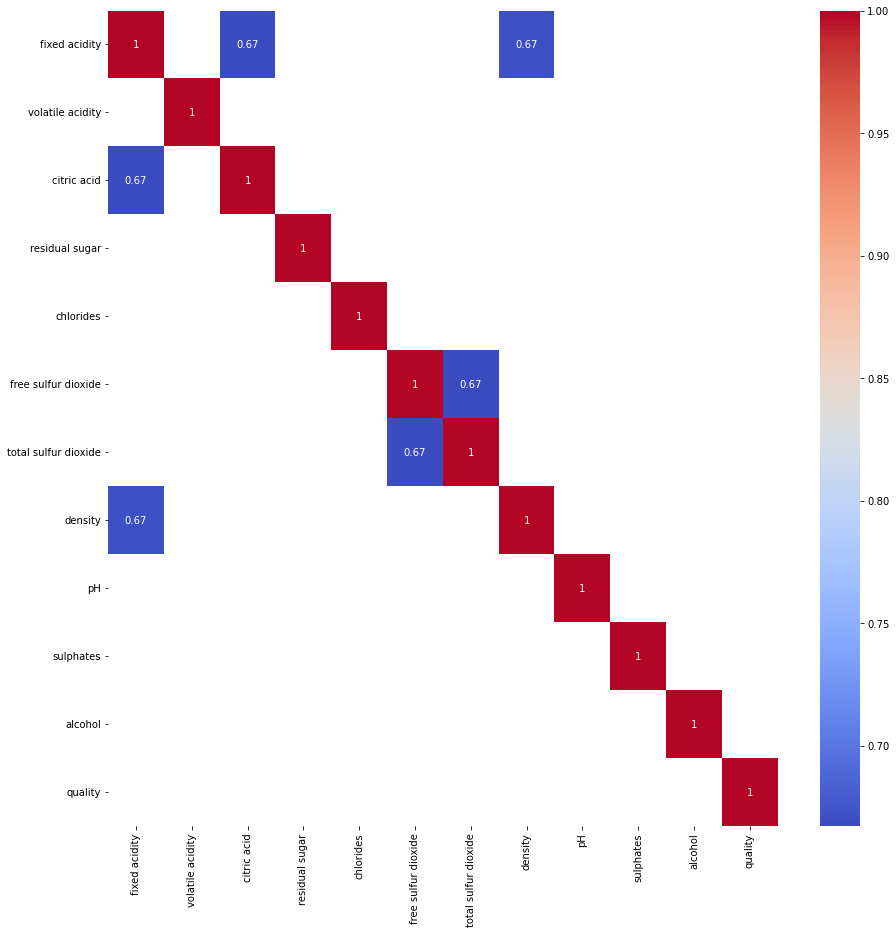

In [58]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr[corr >0.6],annot=True,cmap='coolwarm')
plt.show()

## infrence 
high corelation between  free sulfur dioxide and total sulfur dioxide<br>
high corelation between of  fixed acidity   with density and citric acid

In [ ]:
# droping high correlated 

In [67]:
df.drop(['free sulfur dioxide','fixed acidity'],axis = 1,inplace = True)
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5


## Out-Liers

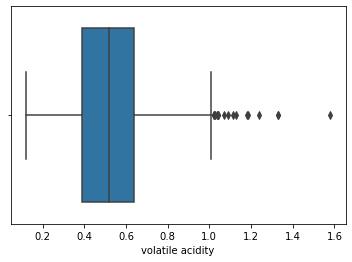

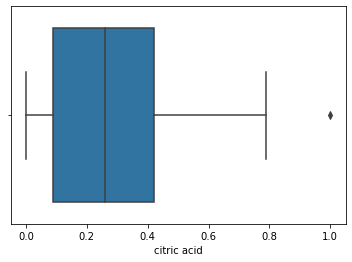

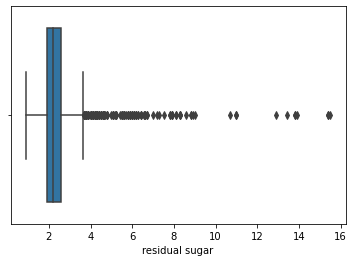

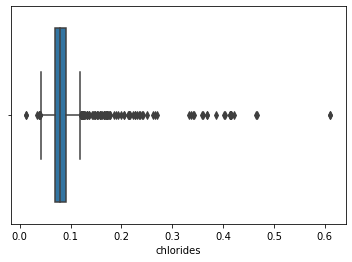

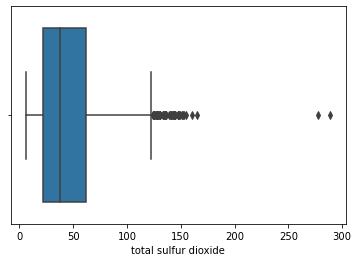

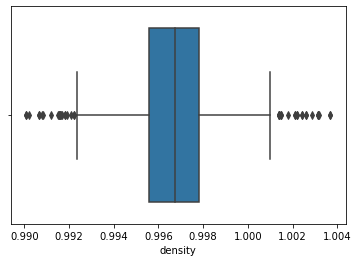

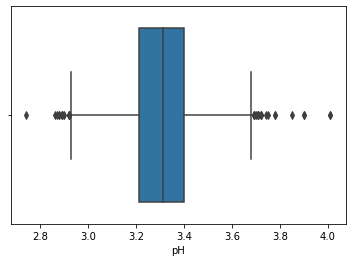

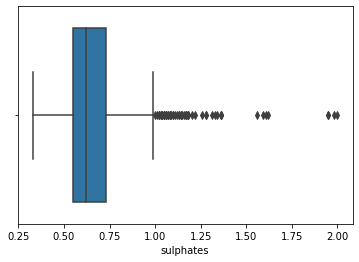

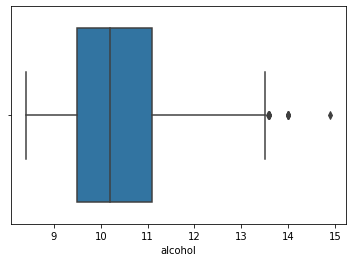

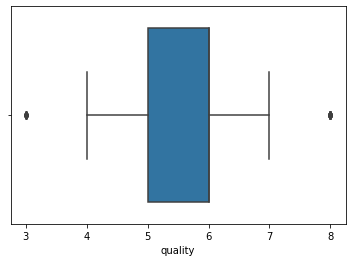

In [83]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.show()

In [84]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.19000,0.22960,0.240000,0.270000,0.52000,0.8400,0.900000,0.9600,1.020000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.00000,0.00000,0.000000,0.000000,0.26000,0.6000,0.660000,0.6800,0.700200,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.40000,1.40000,1.400000,1.590000,2.20000,5.1000,6.006000,6.6040,8.306000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.04298,0.04700,0.049000,0.054000,0.07900,0.1261,0.174120,0.2260,0.360160,0.61100
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,8.00000,9.00000,10.000000,11.000000,38.00000,112.1000,127.000000,135.0000,145.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.99182,0.99258,0.993219,0.993598,0.99675,1.0000,1.000306,1.0008,1.001506,1.00369
pH,1599.0,3.311113,0.154386,2.74000,2.93000,3.00000,3.029400,3.060000,3.31000,3.5700,3.600600,3.6600,3.700200,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.42000,0.44000,0.450000,0.470000,0.62000,0.9300,1.050000,1.1300,1.260400,2.00000
alcohol,1599.0,10.422983,1.065668,8.40000,9.00000,9.00000,9.100000,9.200000,10.20000,12.5000,12.800000,12.9000,13.400000,14.90000
quality,1599.0,5.636023,0.807569,3.00000,4.00000,4.00000,4.000000,5.000000,6.00000,7.0000,7.000000,7.0000,8.000000,8.00000


In [95]:
print(df[df['volatile acidity']>1.020000].shape)
print(df[df['residual sugar']>8.306000].shape)
print(df[df['chlorides']>0.360160].shape)
print(df[df['total sulfur dioxide']> 112.000000].shape)
print(df[df['density']>1.001506].shape)
print(df[df['pH']>3.700200].shape)
print(df[df['sulphates']>1.260400].shape)
print(df[df['alcohol']>13.400000].shape)

(0, 10)
(0, 10)
(0, 10)
(80, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)


In [96]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.02))
    return x

In [89]:
outlier_cols = ['volatile acidity'
,'residual sugar'
,'chlorides'
,'total sulfur dioxide'
,'density'
,'pH'
,'sulphates'
,'alcohol']

In [97]:
df[outlier_cols] = df[outlier_cols].apply(outlier_treatment)

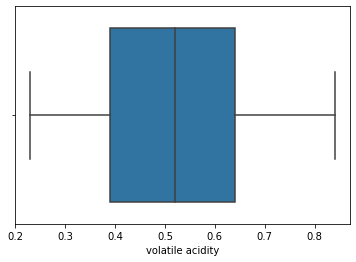

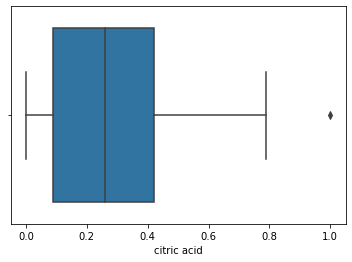

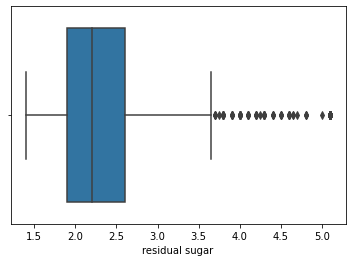

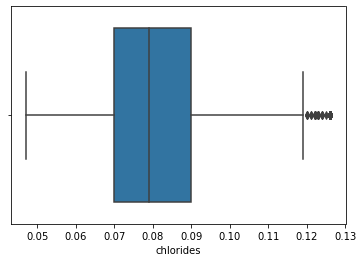

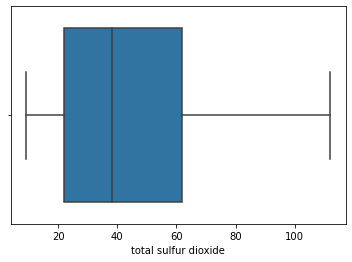

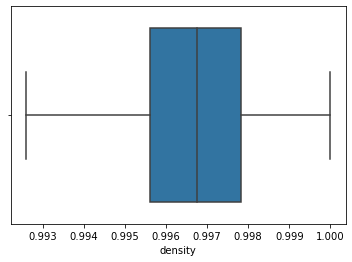

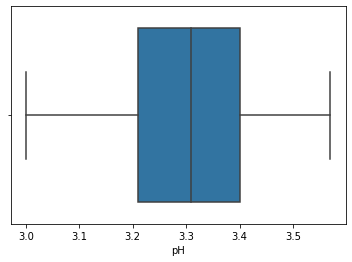

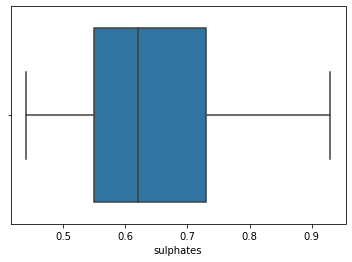

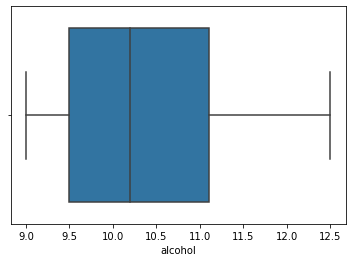

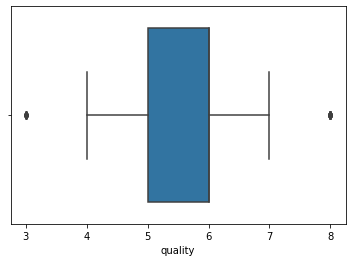

In [98]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.show()

### Checking Target Valriable

In [101]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# encoding quality on bases of 7 and above means good(1) and less(0)

In [104]:
df['quality'] = [1 if i>=7 else 0 for i in df['quality']]

In [107]:
df.drop(['quality_en'],axis =1,inplace =True)

In [108]:
df.head(20)

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.0760,34.0,0.9978,3.51,0.56,9.4,0
1,0.840,0.00,2.6,0.0980,67.0,0.9968,3.20,0.68,9.8,0
2,0.760,0.04,2.3,0.0920,54.0,0.9970,3.26,0.65,9.8,0
3,0.280,0.56,1.9,0.0750,60.0,0.9980,3.16,0.58,9.8,0
4,0.700,0.00,1.9,0.0760,34.0,0.9978,3.51,0.56,9.4,0
5,0.660,0.00,1.8,0.0750,40.0,0.9978,3.51,0.56,9.4,0
6,0.600,0.06,1.6,0.0690,59.0,0.9964,3.30,0.46,9.4,0
7,0.650,0.00,1.4,0.0650,21.0,0.9946,3.39,0.47,10.0,1
8,0.580,0.02,2.0,0.0730,18.0,0.9968,3.36,0.57,9.5,1
9,0.500,0.36,5.1,0.0710,102.0,0.9978,3.35,0.80,10.5,0


In [150]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

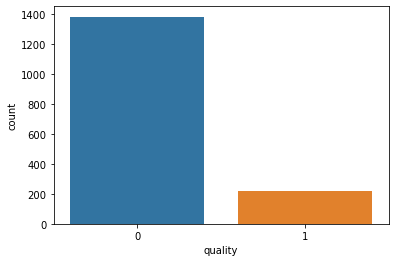

In [151]:
sns.countplot(df['quality'])

In [155]:
# data is inbalanced

### Selecting Dependent(x) and Independent(y) Variable

In [109]:
x = df.drop(['quality'],axis =1)
y = df['quality']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1599, 9)
(1599,)


In [156]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy = 'minority',random_state = 42)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [158]:
y_res.value_counts()

0    1035
1    1035
Name: quality, dtype: int64

### Split the data into train and test

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x_res, y_res,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1552, 9)
(518, 9)
(1552,)
(518,)


# Creating Model

In [124]:
def model_metrics(model,x_train,x_test,y_train,y_test):  # model = instance of model
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions\n',ypred)
    res = {'Train_Score':train_scr,'Test_Score':test_scr}
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    res = {'Train_Score':train_scr,'Test_Score':test_scr}
    return res


#### Model- 1 Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [160]:
m1 = DecisionTreeClassifier()
dt1_res = model_metrics(m1,x_train,x_test,y_train,y_test)


Training score 1.0
Testing score 0.8861003861003861
Predictions
 [0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1
 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0
 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 

In [182]:
result1 = pd.DataFrame(dt1_res,index=['Decision Tree'])
result1

,Train_Score,Test_Score
Decision Tree,1.0,0.8861


### HyperParameter Tuning Using GridSearchCV

In [127]:
from sklearn.model_selection import GridSearchCV

In [135]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':list(range(4,20)),
             'min_samples_split':[8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}

In [143]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=9)
gs1 = GridSearchCV(estimator=bmodel,param_grid=hparams_dt,cv=kf, scoring='accuracy') 
gs1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19],
                         'min_samples_split': [8, 10, 11, 12, 13, 14, 15, 16,
                                               17, 18, 19, 20, 21, 22, 23, 24,
                                               25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [144]:
print('Best Hyperparamters')
print(gs1.best_params_)
print(gs1.best_estimator_)

Best Hyperparamters
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=5, min_samples_split=10)


In [162]:
gs_based_model = DecisionTreeClassifier(**gs1.best_params_)
gs_based_res = model_metrics(gs_based_model,x_train,x_test,y_train,y_test)

Training score 0.8917525773195877
Testing score 0.861003861003861
Predictions
 [0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0
 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0
 0 1 0 0 1 1 1 0 1 0 

In [180]:
result2 = pd.DataFrame(gs_based_res,index=['Decision Tree Hyper param '])
result2

,Train_Score,Test_Score
Decision Tree Hyper param,0.891753,0.861004


# Model 2 Random Forest

In [164]:
m2 = RandomForestClassifier()
rf_model = model_metrics(m2,x_train,x_test,y_train,y_test)

Training score 1.0
Testing score 0.9208494208494209
Predictions
 [0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0
 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1
 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 

In [179]:
result3 = pd.DataFrame(rf_model,index=['Random forest'])
result3

,Train_Score,Test_Score
Random forest,1.0,0.920849


### HyperParameter Tuning Using GridSearchCV

In [167]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9,11,15,19,25],
    'max_leaf_nodes': [3, 6, 9,11,15,19,26],
}

In [171]:
rfmodel = RandomForestClassifier()
kf = KFold(n_splits=5)
rf1 = GridSearchCV(estimator=rfmodel,param_grid=param_grid,cv=kf, scoring='accuracy') 
rf1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9, 11, 15, 19, 25],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9, 11, 15, 19, 26],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='accuracy')

In [172]:
print('Best Hyperparamters')
print(rf1.best_params_)
print(rf1.best_estimator_)

Best Hyperparamters
{'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': 26, 'n_estimators': 50}
RandomForestClassifier(max_depth=15, max_features='log2', max_leaf_nodes=26,
                       n_estimators=50)


In [175]:
rf_based_model = RandomForestClassifier(**rf1.best_params_)
rf_based_res = model_metrics(rf_based_model,x_train,x_test,y_train,y_test)

Training score 0.9162371134020618
Testing score 0.9015444015444015
Predictions
 [0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0
 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1
 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0
 0 1 0 1 1 1 1 0 1 0

In [178]:
result4 = pd.DataFrame(rf_based_res,index=['Randomforest hyper tunning'])
result4

,Train_Score,Test_Score
Randomforest hyper tunning,0.916237,0.901544


#### Logistic Reg

In [173]:
from sklearn.linear_model import LogisticRegression

In [183]:
lr1 = LogisticRegression(max_iter=1000)
lr1_res = model_metrics(lr1,x_train,x_test,y_train,y_test)

Training score 0.8163659793814433
Testing score 0.8262548262548263
Predictions
 [0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0
 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0
 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0
 0 1 0 1 1 1 1 0 1 0

In [184]:
result5 = pd.DataFrame(lr1_res,index=['Logistic Reg'])
result5

,Train_Score,Test_Score
Logistic Reg,0.816366,0.826255


In [185]:
res = pd.concat([result1,result2,result3,result4,result5])
res

,Train_Score,Test_Score
Decision Tree,1.000000,0.886100
Decision Tree Hyper param,0.891753,0.861004
Random forest,1.000000,0.920849
Randomforest hyper tunning,0.916237,0.901544
Logistic Reg,0.816366,0.826255


In [ ]:
# Infernce based on Top MOdel
Randomforest hyper tunning is the Best MOdel